In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce



## Read

In [2]:
df_features = pd.read_csv('./data/dengue_features_train.csv',)

print('Infromaion about the df\n', df_features.info(verbose=True, show_counts=True))
df_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
df_features['Month'] = pd.to_datetime(df_features.loc[:, "week_start_date"]).dt.month
df_features.drop(columns=['week_start_date'], inplace=True)

In [4]:
print('We have {} null data:\n', format(df_features.isnull().sum()))

We have {} null data:
 city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c              

Seems we have a lot of null, but we can fixed it by `.fillna()`.

In [5]:
#use forward fill on the NaNs - good since it's a timeseries
df_features.fillna(method='ffill', inplace=True)
df_features.fillna(method='bfill', inplace=True)

In [6]:
df_label = pd.read_csv('./data/dengue_labels_train.csv',)
print('Infromaion about the df\n', df_label.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB
Infromaion about the df
 None


In [7]:
df_train = pd.concat([df_features, df_label.loc[:,'total_cases']], axis=1)
df_train.drop_duplicates(inplace=True)
print(df_train.shape)
df_train.head()

(1456, 25)


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Month,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,5,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,5,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,5,6


In [8]:
for col in df_train.columns:
    print(col, sum(df_train.loc[:, col].isnull()))

city 0
year 0
weekofyear 0
ndvi_ne 0
ndvi_nw 0
ndvi_se 0
ndvi_sw 0
precipitation_amt_mm 0
reanalysis_air_temp_k 0
reanalysis_avg_temp_k 0
reanalysis_dew_point_temp_k 0
reanalysis_max_air_temp_k 0
reanalysis_min_air_temp_k 0
reanalysis_precip_amt_kg_per_m2 0
reanalysis_relative_humidity_percent 0
reanalysis_sat_precip_amt_mm 0
reanalysis_specific_humidity_g_per_kg 0
reanalysis_tdtr_k 0
station_avg_temp_c 0
station_diur_temp_rng_c 0
station_max_temp_c 0
station_min_temp_c 0
station_precip_mm 0
Month 0
total_cases 0


## Test Set Initial Processig

In [9]:
#Test Data
df_test = pd.read_csv('data/dengue_features_test.csv')
print(df_test.shape)

(416, 24)


In [10]:
for col in df_test.columns:
    print(col, sum(df_test.loc[:, col].isnull()))

city 0
year 0
weekofyear 0
week_start_date 0
ndvi_ne 43
ndvi_nw 11
ndvi_se 1
ndvi_sw 1
precipitation_amt_mm 2
reanalysis_air_temp_k 2
reanalysis_avg_temp_k 2
reanalysis_dew_point_temp_k 2
reanalysis_max_air_temp_k 2
reanalysis_min_air_temp_k 2
reanalysis_precip_amt_kg_per_m2 2
reanalysis_relative_humidity_percent 2
reanalysis_sat_precip_amt_mm 2
reanalysis_specific_humidity_g_per_kg 2
reanalysis_tdtr_k 2
station_avg_temp_c 12
station_diur_temp_rng_c 12
station_max_temp_c 3
station_min_temp_c 9
station_precip_mm 5


---

In [11]:
sj_train = df_train[df_train.city=='sj'].copy()
sj_test = df_test[df_test.city=='sj'].copy()
iq_train = df_train[df_train.city=='iq'].copy()
iq_test = df_test[df_test.city=='iq'].copy()

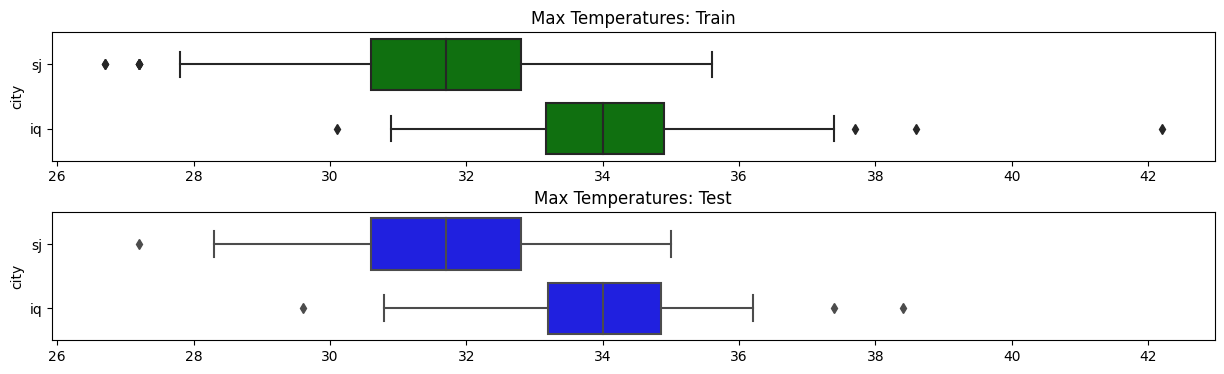

In [12]:
#MAX TEMPERATURES
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_max_temp_c', y='city',
            color='green', data=df_train, ax=ax1)
plt.xlabel('')
plt.title('Max Temperatures: Train')

ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x='station_max_temp_c', y='city',
            color='blue', data=df_test, ax=ax2)
plt.title('Max Temperatures: Test')
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

In [13]:
# df_train_smtc = df_train.loc[:,'station_max_temp_c']
# fig = plt.figure(figsize = (12, 4))  
# plt.subplot(211)
# # vert = True 时 箱型图为垂直方式
# red_circle = dict(markerfacecolor='r', marker='o')  
# df_train_smtc.plot.box(vert = False, grid = True,  
#               title='Max Temperatures: Train', flierprops=red_circle)

# ### 构建一个散点图 ###
# # 通过describe()函数获得数据的统计量描述信息
# data_des = df_train_smtc.describe()  
# q1 = data_des['25%']  
# q3 = data_des['75%']  
# iqr = q3 - q1  
# minimum = q1 - 1.5 * iqr  
# maximum = q3 + 1.5 * iqr  
# outlier = df_train_smtc[(df_train_smtc < minimum) | (df_train_smtc > maximum)]  
# correct = df_train_smtc[(df_train_smtc >= minimum) | (df_train_smtc <= maximum)]
# print(correct.index)

# print('all{}'.format(len(outlier)))

# plt.subplot(212)
# plt.scatter(correct.index, correct.values, s = 50,color = 'green', edgecolor = 'black', alpha = 0.5, label='normal')  
# plt.scatter(outlier.index, outlier.values, color = 'red', s = 50, edgecolor = 'black', label='abnormal')

# # # 为异常值附上文字说明
# for x, y in zip(outlier.index, outlier.values):  
#     plt.text(x = x + 10, y = y - 0.15, s = '{:0.2f}'.format(y), color = 'black', fontsize = 12)

# # 添加x横轴标线
# plt.axhline(y = maximum, color = 'blue', linestyle = '--', label = 'upper')  
# plt.axhline(y = minimum, color = 'red', linestyle = '--', label = 'lower')



In [14]:
to_trim = ['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
# Trim each column in sj and iq, to be within the minimum and maximum value of the corresponding column in sjtest and iqtest
for v in to_trim:
    # Trim the values in sj[v] to be within the range of sjtest[v].min() and sjtest[v].max()
    sj_train.loc[:,v] = [min(x, sj_test[v].max()) for x in sj_train[v]]
    sj_train.loc[:,v] = [max(x, sj_test[v].min()) for x in sj_train[v]]
    # Trim the values in iq[v] to be within the range of iqtest[v].min() and iqtest[v].max()
    iq_train.loc[:,v] = [min(x, iq_test[v].max()) for x in iq_train[v]]
    iq_train.loc[:,v] = [max(x, iq_test[v].min()) for x in iq_train[v]]

In [15]:
# create an object of the OneHotEncoder
ce_one = ce.OneHotEncoder(cols=['city']) 

en_df = ce_one.fit_transform(df)
en_df.head()

NameError: name 'df' is not defined

In [ ]:
# print(df_features.loc[:,'year'].value_counts())

In [ ]:
for col in en_df.columns:
    print(col, sum(en_df.loc[:, col].isnull()))

city_1 0
city_2 0
year 0
weekofyear 0
precipitation_amt_mm 0
reanalysis_air_temp_k 0
reanalysis_avg_temp_k 0
reanalysis_dew_point_temp_k 0
reanalysis_max_air_temp_k 0
reanalysis_min_air_temp_k 0
reanalysis_precip_amt_kg_per_m2 0
reanalysis_relative_humidity_percent 0
reanalysis_specific_humidity_g_per_kg 0
reanalysis_tdtr_k 0
station_avg_temp_c 0
station_diur_temp_rng_c 0
station_max_temp_c 0
station_min_temp_c 0
station_precip_mm 0
Month 0
total_cases 0


In [ ]:
fill_df = en_df.dropna()

In [ ]:
fill_df.shape

(1456, 21)

In [ ]:
# fill_df = en_df.fillna(en_df.mean())


In [ ]:
fill_df.isnull().any()

city_1                                   False
city_2                                   False
year                                     False
weekofyear                               False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
Month                                    False
total_cases                              False
dtype: bool

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [ ]:
y = fill_df.loc[:, 'total_cases']
X = fill_df.drop(columns=['total_cases'])
X

,city_1,city_2,year,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Month
0,1,0,1990,18,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,0,1990,19,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,0,1990,20,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,5
3,1,0,1990,21,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,5
4,1,0,1990,22,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0,1,2010,21,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,0,1,2010,22,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,6
1453,0,1,2010,23,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,6
1454,0,1,2010,24,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# pipe = make_pipeline(MinMaxScaler(), Ridge())
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(pipe.predict(X_test), y_test))

44.016360470836425

In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(max_depth=6, random_state=42))
pipe.fit(X_train, y_train)  # apply scaling on training data

sqrt(mean_squared_error(pipe.predict(X_test), y_test))

30.95327414862133